# ДЗ Линейная регрессия

В данном задании мы рассмотрим набор данных об учащихся, собранный в 2006 году в одной из школ Португалии. Данные представлены в неудобном для машинного обучения виде, и содержат мусор. Ваша задача &mdash; привести их к надлежащему виду и обучить на них простую модель.

Данные состоят из четырех файлов:
- data.csv &mdash; основная таблица с информацией о учащихся
- scores.csv &mdash; список финальных оценок по одному из предметов (20-балльная шкала переведенная в проценты)
- attendance.csv &mdash; таблица посещений занятий по этому предмету
- school_support.txt &mdash; список учащихся, которым оказывается финансовая поддержка

Ваша задача &mdash; построить модель для предсказания финальных оценок исходя из всех остальных данных и проверить качество ее работы с помощью кросс-валидации. В качестве алгоритма мы будем использовать линейную регрессию, а качество будем измерять по метрике RMSE.

Расшифровка столбцов в data.csv для справки:
- age &mdash; возраст
- Medu &mdash; уровень образования матери (по некоторой условной шкале)
- Fedu &mdash; уровень образования отца (по некоторой условной шкале)
- traveltime &mdash; время в пути до школы (1 – < 15 мин., 2 – от 15 до 30 мин., 3 – от 30 мин. to 1 ч.
или 4 – > 1 ч.)
- studytime &mdash; время, затрачиваемое на занятия вне школы (1 – < 2 ч., 2 – от 2 до 5 ч., 3 – от 5 до 10 ч. или 4 – > 10 ч.)
- famrel &mdash; насколько хорошие отношения в семье у учащегося (по некоторой условной шкале)
- freetime &mdash; количество свободного времени вне школы (по некоторой условной шкале)
- goout &mdash; время, затрачиваемое на общение с друзьями (по некоторой условной шкале)
- Dalc &mdash; количество употребления алкоголя в учебные дни (по некоторой условной шкале)
- Walc &mdash; количество употребления алкоголя в неучебные дни (по некоторой условной шкале)
- health &mdash; уровень здоровья (по некоторой условной шкале)
- sex_M &mdash; пол: мужской (1) или женский (0)
- address_U &mdash; живет ли учащийся в городе (1) или в пригороде (0)
- famsize_LE3 &mdash; размер семьи: не больше 3 человек (1) или больше (0)
- Pstatus_T &mdash; живут ли родители вместе (1) или отдельно (0)
- nursery &mdash; посещал ли учащийся детский сад
- plans_university &mdash; планирует ли учащийся поступать в университет (-1 или 1)
- past_failures &mdash; количество неудовлетворительных оценок по другим предметам ранее (от 0 до 4)

*Примечание. Несколько признаков в данных содержат ошибки/проблемы/некорректности. Эти проблемы нужно исправить. Для
проверки &mdash; всего в данных таких проблем четыре.*

---
### Код для cross-валидации

In [312]:
import pandas as pd
import numpy as np
from sklearn import linear_model, model_selection

In [313]:
def get_score(X, Y, columns, folds):
    return model_selection.cross_val_score(linear_model.LinearRegression(), X[columns], Y, cv=folds)


### Задача 1: сломанный признак (а может и не один)
__(1 балл)__

Загрузите таблицу data.csv.

Найдите в данных сломанный признак (он не соответствует описанию) и исправьте его.

---
#### Сломанный признаки

В описании даны признаки *plans_university* и *past_failures*. В данных эти 2 признака "склеены", (т.е. вместо `-1` и `3` написано `-13` в колонке *plans_universitypast_failures*)

In [314]:
data = pd.read_csv("data.csv")

# исправление plans_universitypast_failures

data["plans_university"] = np.sign(data["plans_universitypast_failures"])
data["past_failures"] = np.abs(data["plans_universitypast_failures"]) % 10

data = data.drop(columns=["plans_universitypast_failures"])


### Задача 2: пропуски в данных 
__(1 балл)__

Проверьте, есть ли в данных пропуски (значения NaN). Замените все пропущенные значения на среднее значение этого признака по столбцу.

*Hint: изучите в pandas функции loc, isnull, а также передачу булевых массивов в качестве индексов.*

In [315]:
for column in data.columns:
    isn = data[column].isnull()
    nv = data[column][~isn].mean()
    data.loc[isn, column] = round(nv)

### Задача 3: нормализация данных
__(1 балл)__

Нормализуйте данные.

In [316]:
def column_standardization(table, column_name):
    stdev = table[column_name].var() ** 0.5
    mean = table[column_name].mean()
    table[column_name] = (table[column_name] - mean) / stdev

need_norm = [
    "age",
    "Medu",
    "Fedu",
    "traveltime",
    "studytime",
    "famrel",
    "freetime",
    "goout",
    "Dalc",
    "Walc",
    "health",
    "past_failures"
]

for column in need_norm:
    column_standardization(data, column)

### Задача 4: кросс-валидация для исходных данных
__(1 балл)__

Загрузите файл scores.csv и протестируйте, как линейная регрессия предсказывает ответ сейчас (с помощью кросс-валидации).

*Hint: воспользуйтесь sklearn.linear_model и sklearn.model_selection.*

---
#### Итоговый балл

Создается колонка *score* с баллами, *data* и *score* синхронно шаффлятся

In [317]:
from sklearn.utils import shuffle

scores = pd.read_csv("scores.csv", names=['score'])
data, scores = shuffle(data, scores)

column_standardization(scores, 'score')

---
#### Запуск

Выводится среднее средних значений по нескольким запускам cross-валидации и строится график разпределения этих средних

0.21447575354615317


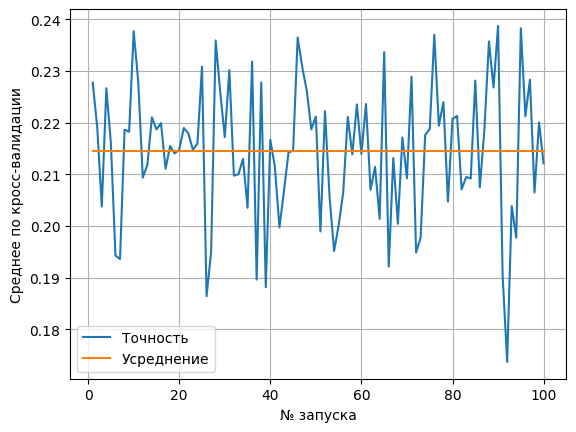

In [318]:
import matplotlib.pyplot as plt

k = 100

a = []
c = [i for i in range(1, k + 1)]
for i in range(k):
    data, scores = shuffle(data, scores)
    a.append(get_score(data, scores, data.columns, 4).mean())

mean = sum(a) / len(a)
print(mean)

plt.plot(c, a, label='Точность')
plt.plot(c, [mean for _ in range(k)], label='Усреднение')
plt.xlabel("№ запуска")
plt.ylabel("Среднее по кросс-валидации")
plt.grid()
plt.legend()
plt.show()

### Задача 5: полные данные
__(2 балла)__

Воспользуйтесь файлами attendance.csv и school_support.txt для того, чтобы добавить новые признаки в данные. Желательно по максимуму использовать возможности pandas для упрощения преобразований.

school_suport число в строке значит что i-ый школьник из исходной таблицы получал мат помощь

---
#### Заново считаем данные без нормализации

In [319]:
data = pd.read_csv("data.csv")

# исправление plans_universitypast_failures

data["plans_university"] = np.sign(data["plans_universitypast_failures"])
data["past_failures"] = np.abs(data["plans_universitypast_failures"]) % 10

data = data.drop(columns=["plans_universitypast_failures"])

for column in data.columns:
    isn = data[column].isnull()
    nv = data[column][~isn].mean()
    data.loc[isn, column] = round(nv)

scores = pd.read_csv("scores.csv", names=['score'])
data, scores = shuffle(data, scores)

---
#### Информация о посещаемости

Создается колонка *attendance*, в которой указана разность кол-ва пропущенных и посещенных занятий (она нормализуется)

In [320]:
att = pd.read_csv("attendance.csv", sep=';')
att[att.isnull()] = -1
att[att == '+'] = 1

data["attendance"] = att.sum(axis=1)

---
#### Школьная поддержка

Создается булевая колонка *support*, в которой стоит `1`, если ученик получал поддержку, и `0` иначе (считается, что ученики даны в 1-нумерации)

In [321]:
sup = pd.read_csv("school_support.txt", names=[0])[0].unique() - 1

arr = pd.Series(np.zeros(len(data)))
arr[sup] = 1

data["support"] = arr

### Задача 6: борьба с выбросами
__(3 балла)__

Качество предсказания может ухудшаться, если в данных присутствуют корректные значения признаков (с точки зрения чтения данных и применения методов), но не соответствующие реальным объектам. Например, данные могли быть введены в неверном формате, а потом слишком грубо приведены к общему виду, из-за чего ошибка не была замечена.
Попробуем от такого избавиться &mdash; а для этого такие объекты нужно сначала найти. Конечно, нам еще недоступны многие продвинутые способы, но давайте попробуем обойтись простыми.

Первый способ это сделать &mdash; посмотреть для каждого признака на распределение его значений и проверить крайние значения на правдоподобность.

*Hint 1: используйте функцию DataFrame.hist*

*Hint 2: в описании датасета выше есть информация, необходимая для восстановления правильных значений*

---
#### Распечататка значений признаков

In [322]:
for column in data.columns:
    print(f"{column}: {np.sort(data[column].unique())}")

age: [  15   16   17   18   19   20   21   22 1987 1988 1989 1990 1991]
Medu: [0 1 2 3 4]
Fedu: [0 1 2 3 4]
traveltime: [ 1  2  3  4 10 25 40 50]
studytime: [1 2 3 4]
famrel: [1 2 3 4 5]
freetime: [1 2 3 4 5]
goout: [1. 2. 3. 4. 5.]
Dalc: [1. 2. 3. 4. 5.]
Walc: [1. 2. 3. 4. 5.]
health: [1 2 3 4 5]
sex_M: [0 1]
address_U: [0 1]
famsize_LE3: [0 1]
Pstatus_T: [0 1]
nursery: [0 1]
plans_university: [-1  1]
past_failures: [0 1 2 3]
attendance: [-32 -28 -20 -16 -12 -10 -4 0 2 4 6 8 10 12 14 16 18 20 22 24 26 28 30 32]
support: [0. 1.]


---
#### Выбросы

- признак *age* в таблице принимает значения вроде `1989`. Считаю, что это год рождения, надо заменить на возраст
- признак *traveltime* принимает значения > 4 (считаем, что это время в минутах)
- замечено, что колонка scores есть много значений на полуинтервале [0;1). Принято решение интерпретировать это как долю от сотни (макс. балла).

In [323]:
# исправление age

bad = data["age"] > 1000
data.loc[bad, "age"] = 2006 - data.loc[bad, "age"]

# исправление traveltime

enum = [(5, 14), (15, 29), (30, 60), (60, 1000000000)]
for i in range(len(enum)):
    bad = (data["traveltime"] >= enum[i][0]) & (data["traveltime"] <= enum[i][1])
    data.loc[bad, "traveltime"] = i + 1

# исправление scores

scores['score'][scores['score'] < 1] *= 100

Другой простой способ найти выбросы &mdash; сделать предсказание, посчитать ошибку на каждом объекте по отдельности и посмотреть на объекты с наибольшей ошибкой. Обратите внимание, что просто удалять все объекты с высокой ошибкой нельзя &mdash; это, конечно, хороший способ добиться меньшей ошибки (на данной выборке), но одновременно вы ухудшите обобщающую способность алгоритма. Вместо этого вам нужно найти однозначно ошибочные записи и их исправить.

*Hint: возможно, все проблемы уже были найдены первым способом; для проверки &mdash; в сумме здесь нужно исправить 3 проблемы.*

---
#### Подсчёт ошибки __MSE__

In [324]:
data, scores = shuffle(data, scores)

xtrain, xtest, ytrain, ytest = model_selection.train_test_split(data, scores, test_size=0.1)

reg = linear_model.LinearRegression()
reg.fit(xtrain, ytrain['score'])

mse = (ytest.to_numpy().astype('float64') - reg.predict(xtest)) ** 2
arr = [(mse[i][0], i) for i in range(len(mse))]

arr.sort(reverse=True)
for i in range(len(arr)):
    print(f"Индекс: {arr[i][1]}, Корректно: {ytest['score'].iloc[arr[i][1]]}, Предсказание: {reg.predict(xtest)[arr[i][1]]}, Ошибка: {arr[i][0]}")

Индекс: 58, Корректно: 0.0, Предсказание: 45.04943271547072, Ошибка: 3078.825309771162
Индекс: 7, Корректно: 0.0, Предсказание: 45.247704918855995, Ошибка: 3078.825309771162
Индекс: 56, Корректно: 85.0, Предсказание: 74.35548004193006, Ошибка: 871.0075201397634
Индекс: 45, Корректно: 85.0, Предсказание: 67.15431337005484, Ошибка: 871.0075201397634
Индекс: 25, Корректно: 85.0, Предсказание: 62.95298517912998, Ошибка: 871.0075201397634
Индекс: 48, Корректно: 80.0, Предсказание: 64.14378409542057, Ошибка: 600.8791548239633
Индекс: 43, Корректно: 80.0, Предсказание: 70.02873206531973, Ошибка: 600.8791548239633
Индекс: 41, Корректно: 80.0, Предсказание: 65.54258419698698, Ошибка: 600.8791548239633
Индекс: 20, Корректно: 80.0, Предсказание: 62.21966397599201, Ошибка: 600.8791548239633
Индекс: 6, Корректно: 80.0, Предсказание: 54.09948010459834, Ошибка: 600.8791548239633
Индекс: 42, Корректно: 35.0, Предсказание: 50.7829488389241, Ошибка: 419.72386698176274
Индекс: 59, Корректно: 75.0, Предск

---
#### Удаление нулей

В связи с высокой ошибкой решено было удалить нулевые значения _scores_

In [325]:
data = data.drop(index=scores[scores['score'] == 0].index)
scores = scores.drop(index=scores[scores['score'] == 0].index)

### Финальное предсказание и отчёт

Проведите предсказание еще раз и сравните качество с исходным. Запишите свои наблюдения - как изменялось качество обучения модели при использовании разных модификаций данных. 

---
#### Номализация данных после обработки выбросов

In [326]:
need_norm = [
    "age",
    "Medu",
    "Fedu",
    "traveltime",
    "studytime",
    "famrel",
    "freetime",
    "goout",
    "Dalc",
    "Walc",
    "health",
    "past_failures",
    "attendance"
]

for column in need_norm:
    column_standardization(data, column)


column_standardization(scores, 'score')
data, scores = shuffle(data, scores)

---
#### Финальный запуск

0.2656133348327308


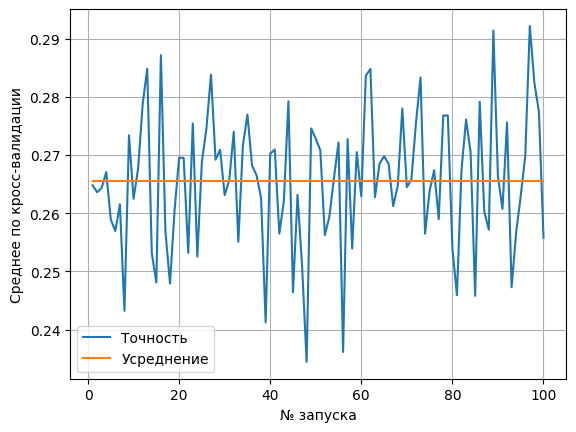

In [327]:
import matplotlib.pyplot as plt

k = 100

a, b = [], []
c = [i for i in range(1, k + 1)]
for _ in range(k):
    data, scores = shuffle(data, scores)
    a.append(get_score(data, scores, data.columns, 4).mean())

mean = sum(a) / len(a)

print(mean)

plt.plot(c, a, label='Точность')
plt.plot(c, [mean for _ in range(k)], label='Усреднение')
plt.xlabel("№ запуска")
plt.ylabel("Среднее по кросс-валидации")
plt.grid()
plt.legend()
plt.show()

### Отчёт

В процессе решения задачи были пройлены следующие этапы:

- Считывание данных и их приведение к виду, описанному в условии. Сразу после этого при запуске модель выдавала среднюю точность, равную $\approx 0.21$.
- Отбор выбосов в данных и приведение их к нормальному виду. После удаления выбросов модель стала работать несколько лучше (показания: $0.23-0.24$).
- Были продолжительные эксперименты с оптимальным набором колонок, однако, как выяснилось, наибольшая точность достигается при запуске на полном наборе колонок
- В конце концов, наибольшая точность ($\approx 0.26$) была достигнута после удаления нулевых значений scores